In [1]:
# Escenario 2 - Balancear la cantidad de registros según la variable target
# selecciono 150.000 registros por cada opción de mi target, 
# entonces son 150.000 con SI y 50.000 con NO (300.000 registros del total)

In [2]:
# Cargar funciones de la librería de python data analysis
import pandas as pd 

# Leer csv con datos y cargar en el dataframe data
# data = pd.read_csv("data/analisis_desercion_2018.csv", sep=';', encoding = "ISO-8859-1") 
data2018 = pd.read_csv("data/analisis_desercion_2018.csv", sep=';', encoding = "ISO-8859-1") 
data2019 = pd.read_csv("data/analisis_desercion_2019.csv", sep=';', encoding = "ISO-8859-1") 
data2020 = pd.read_csv("data/analisis_desercion_2020.csv", sep=';', encoding = "ISO-8859-1") 

In [3]:
# concatenar los 3 datasets
data = pd.concat([data2018,data2019,data2020])
# Preview de las 5 primeras filas de data 
data.head()

,estudiante_id,grado_curso,edad,tiene_sobreedad,tipo_documento,sexo,es_indigena,idioma,tipo_gestion_id,tipo_zona_id,...,cuantas_personas_vive,cuantas_piezas_dormir,recibe_beneficio,como_se_traslada_escuela,cuanto_tiempo_tarda,recibe_alimentacion,nivel_pobreza,matriculado_periodo_actual,estudiante_id_posible,desertor
0,3,11,13,0,1,1,0,Castellano,1,1,...,4,1,1,Caminando,Menos de 30 minutos,0,3.420555,1,NaN,0
1,4,6,8,0,1,2,0,Guaraní,1,1,...,4,1,0,Caminando,Menos de 30 minutos,0,20.333610,1,NaN,0
2,5,7,8,0,1,1,0,Castellano,1,1,...,4,2,0,Caminando,Menos de 30 minutos,0,23.435420,1,NaN,0
3,78,6,7,0,1,1,0,Castellano,1,1,...,4,2,0,En moto,Menos de 30 minutos,0,11.506870,0,NaN,1
4,13,7,8,0,1,1,0,Castellano,3,1,...,4,4,0,Caminando,Menos de 30 minutos,0,14.552570,1,NaN,0


In [4]:
# Identificar variables categoricas
df = data
df.dtypes[df.dtypes=='object']

idioma                      object
como_se_traslada_escuela    object
cuanto_tiempo_tarda         object
dtype: object

In [5]:
# cargar codificador por etiquetas (LabelEncoder)
from sklearn import preprocessing

# Codificar cada variable categorica con su propio encoder --> utilizo .astype(str) para convertir los valores a string
leIdioma = preprocessing.LabelEncoder()
df["idioma"] = leIdioma.fit_transform(df["idioma"].astype(str))
leComoSeTrasladaEscuela = preprocessing.LabelEncoder()
df["como_se_traslada_escuela"] = leComoSeTrasladaEscuela.fit_transform(df["como_se_traslada_escuela"].astype(str))
leCuantoTiempoTarda = preprocessing.LabelEncoder()
df["cuanto_tiempo_tarda"] = leCuantoTiempoTarda.fit_transform(df["cuanto_tiempo_tarda"].astype(str))

df.head()

,estudiante_id,grado_curso,edad,tiene_sobreedad,tipo_documento,sexo,es_indigena,idioma,tipo_gestion_id,tipo_zona_id,...,cuantas_personas_vive,cuantas_piezas_dormir,recibe_beneficio,como_se_traslada_escuela,cuanto_tiempo_tarda,recibe_alimentacion,nivel_pobreza,matriculado_periodo_actual,estudiante_id_posible,desertor
0,3,11,13,0,1,1,0,0,1,1,...,4,1,1,0,1,0,3.420555,1,NaN,0
1,4,6,8,0,1,2,0,1,1,1,...,4,1,0,0,1,0,20.333610,1,NaN,0
2,5,7,8,0,1,1,0,0,1,1,...,4,2,0,0,1,0,23.435420,1,NaN,0
3,78,6,7,0,1,1,0,0,1,1,...,4,2,0,2,1,0,11.506870,0,NaN,1
4,13,7,8,0,1,1,0,0,3,1,...,4,4,0,0,1,0,14.552570,1,NaN,0


In [6]:
# Verificar inversa de codificacion
leIdioma.inverse_transform(df["idioma"])
leComoSeTrasladaEscuela.inverse_transform(df["como_se_traslada_escuela"])
leCuantoTiempoTarda.inverse_transform(df["cuanto_tiempo_tarda"])

array(['Menos de 30 minutos', 'Menos de 30 minutos',
       'Menos de 30 minutos', ..., 'SIN DATO', 'SIN DATO', 'SIN DATO'],
      dtype=object)

In [7]:
#### Importar svm model
from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

# balancear el dataframe con misma cantidad de desertores y no desertores
df1 = df[df['desertor'] == 1] 
df0 = df[df['desertor'] == 0] 

df1 = df1.iloc[:150000]
df0 = df0.iloc[:150000]

# concatenar los 2 df
dflimit = pd.concat([df0,df1])

# usar correlacion feature selection: True | False
featureSelection = False

if(featureSelection):
    # Correlación con desertor
    cm = df.corr()
    #print(cm.loc[(cm['desertor'].abs() > 0.10), 'desertor'])

    X = df.loc[:,[
                    'edad',
                    'repitio',
                    'aprobado_ordinario',
                    'aprobado_complementario',
                    'recibe_alimentacion',
                    'grado_curso'
               ]]
else:
    # se usan todas las variables input, menos estudiante_id_posible y matriculado_periodo_actual    
    X = dflimit.iloc[:,1:28]
    
# variable target
y = dflimit['desertor']   # NO=0, SI=1

# Split en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Normalizacion a [0-1]
min_max_scaler_train = preprocessing.MinMaxScaler()
xNormTrain = pd.DataFrame(min_max_scaler_train.fit_transform(X_train.values))
min_max_scaler_test = preprocessing.MinMaxScaler()
xNormTest = pd.DataFrame(min_max_scaler_test.fit_transform(X_test.values))

#Crear el clasificador svm 
if(featureSelection):
    clf = svm.SVC(kernel='rbf', probability=1) # kernel={linear, rbf, poly, sigmoid}
else:
    # pruebas iniciales sin gridsearch
    clf = svm.SVC(kernel='rbf', max_iter=4000, probability=1) # kernel={linear, rbf, poly, sigmoid}    
    
    # prueba con resultado de gridsearch
    #clf = svm.SVC(kernel='rbf', C=1000, gamma=0.1, probability=1) 
    #C=1000, gamma=0.1, kernel=rbf, score=0.790

#Train the model using the training sets
clf.fit(xNormTrain, y_train)

#Predict the response for test dataset
y_pred = clf.predict(xNormTest)

print("\nTrain Score:",clf.score(xNormTrain, y_train))
print("\nAccuracy:",metrics.accuracy_score(y_test, y_pred))
metrics.precision_recall_fscore_support(y_test, y_pred, average=None)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)



Train Score: 0.5612571428571429

Accuracy: 0.5620333333333334


(array([0.63872236, 0.53890873]),
 array([0.29463298, 0.83184517]),
 array([0.40325193, 0.65407602]),
 array([45202, 44798], dtype=int64))

In [8]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.64      0.29      0.40     45202
           1       0.54      0.83      0.65     44798

    accuracy                           0.56     90000
   macro avg       0.59      0.56      0.53     90000
weighted avg       0.59      0.56      0.53     90000



In [9]:
# Calcular matriz de confusion
pd.crosstab(y_test, y_pred, 
            rownames=['actual'], 
            colnames=['pred'], margins=False, margins_name="Total")

pred,0,1
actual,,
0,13318,31884
1,7533,37265


In [10]:
# Obtener scores de clasificación en las clases 0 o 1
y_scores = clf.predict_proba(xNormTest)

# Crear dataframe de predicciones con scores, filtrar segun criterio 
dp = pd.DataFrame(zip(y_test,y_pred,y_scores[:,0],y_scores[:,1]), columns=['actual','pred','prob_yes','prob_no'])
dp

,actual,pred,prob_yes,prob_no
0,1,1,0.381212,0.618788
1,0,1,0.226268,0.773732
2,0,1,0.373878,0.626122
3,1,0,0.466747,0.533253
4,0,1,0.384349,0.615651
...,...,...,...,...
89995,0,0,0.492553,0.507447
89996,0,1,0.294255,0.705745
89997,0,1,0.401300,0.598700
89998,1,1,0.054663,0.945337


0.7232126101073298


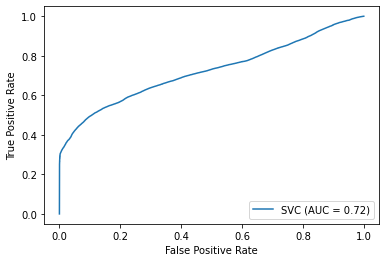

In [11]:
# ROC Curve
import numpy as np
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test, y_scores[:,1]))
metrics.plot_roc_curve(clf, xNormTest, y_test)